In [87]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sys.path.append('..')
import Functions as f

In [88]:
data = pd.read_csv('data/secret_polynomial.csv').to_numpy()
np.random.shuffle(data)
# splitting the data into training and testing (80-20)
X_train, X_test, y_train, y_test = train_test_split(data[:, 0], data[:, 1], test_size=0.2)

- Plotting the training data.

Text(0.5, 1.0, 'Training data')

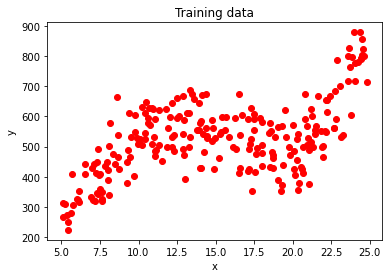

In [89]:
figure, axes = plt.subplots()
axes.scatter(X_train, y_train, color='red')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Training data')

Plotting the testing data points and the curve for each degree of polynomial.

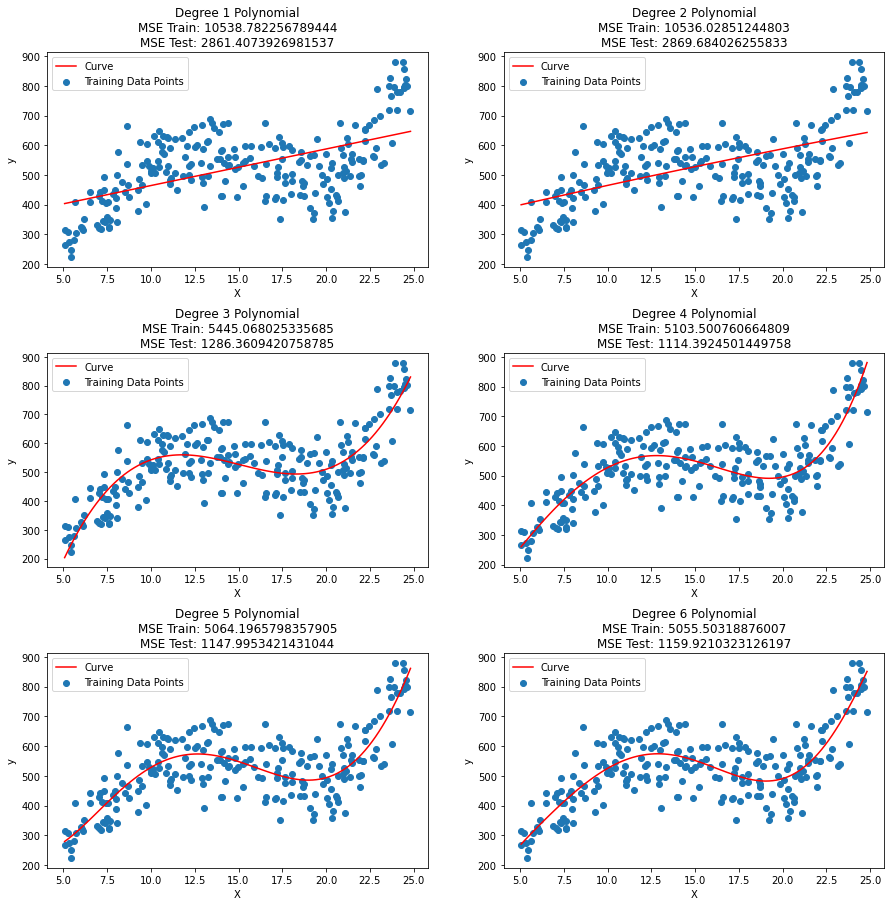

In [90]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
# extending the matrix for both training and testing data
# this is done after each degree of polynomial is added
# so that the previous polynomial is also included
Xe_train = np.c_[np.ones((X_train.shape[0],1)) , X_train]
Xe_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
x_points = np.linspace(X_train.min(), X_train.max(), 100)
X_curve = np.c_[np.ones((x_points.shape[0], 1)), x_points]

for i in range(len(axes)):
    if i > 0:
        # here I add the new polynomial column to the matrix if the degree is not 1
        new_column_train = X_train**(i+1)
        new_column_test = X_test**(i+1)
        new_column_curve = x_points**(i+1)
        Xe_train = np.c_[Xe_train, new_column_train]
        Xe_test = np.c_[Xe_test, new_column_test]
        X_curve = np.c_[X_curve, new_column_curve]
        # calculating the beta coefficients using the normal equation
    beta = f.normal_equation(Xe_train, y_train)
    y_curve = X_curve.dot(beta)
    # using the cost function to calculate the mse for training and testing data
    mse_train = f.cost_function(Xe_train, y_train, beta, len(y_train))
    mse_test = f.cost_function(Xe_test, y_test, beta, len(y_train))
    axes[i].scatter(X_train, y_train, label='Training Data Points')
    axes[i].plot(x_points, y_curve, color='r', label='Curve')
    axes[i].set_title('Degree ' + str(i + 1) + ' Polynomial\nMSE Train: ' + str(mse_train) + '\nMSE Test: ' + str(mse_test))
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('y')
    axes[i].legend()

As expected, degree 1 and two gives the highest mean squared error results for both training and testing data.
Degree 4 and 5 seems to be the best fit for the data, as it has the lowest mean squared error for both training and testing data, in any random state.
Degree 6 gives the lowest mean squared error for the training data, but it gives the higher mean squared error for the testing data. This is a sign of overfitting,
which means that the model won't be able to generalize well, with each additional degree the model will be more and more over fitted.
